# Machine Learning 1 Final Exam
## Part 1: Hands-On (100 points)
04 Sept 2021


<div>
    <b>General Instructions </b>
    <ol>
        <li>Read each paragraph and instructions <i>carefully</i>.</li>
        <li>Fill in the <b>None</b> or <b>X</b> as required by the problem.</li>
        <li>For coding block exercises, place your code in the space provided, being <i>mindful</i> in the indentation of your code.</li>
        <li>Open Everything but cite your sources if you will be using someone else ideas. </li>
        <li>You cannot in anyway communicate with your classmates. Cheating is punishable by expulsion.</li>
        


<i>Note: This notebook is accompanied by the datasets required by each problem.</i>
</div>

## Part 2. TigerPay, an Advanced Cashless Payment for EveryJuan: Regression Problem (50 pts)

TigerPay is a one-year fintech company that provides convenient and efficient payment and money transfer utilizing the most secured blockchain technology. It is envisioned to be one of the more considerable players competing against the likes of GCASH and PAYMAYA. It will be a free payment platform for life. Tigerpay will feature a real-time payment and money transfer utilizing advanced end-to-end electronic payments and collections. Currently, with less than 50000 customers, the immediate goal is to increase market share in terms of the **total amount of transaction payment.**


<img src="tigerpay.png">


The **data includes** 1000 users with the following information:

1. `Gender`:  "1" Female,  "0" Male
2. `Age ` : in years
3. `Location` : NCR, Calabarzon, Others
4. `Economic Status`:  "0" Student,  "1" Non-Working, "2" Working
5. `Marital Status`: Single, Married, Separated	
6. `Monthly Earnings or Allowance`: in PhP
7. `GCASH User`: "0" No,  "1" Yes
8. `PAYMAYA User`: "0" No,  "1" Yes
9. `Car Owner`: "0" No,  "1" Yes
10. `Type of House` : owned, rent to own, rented
11. `Degree Completed` : elem, hs, college and up 
12. `Average Transaction`: in PhP per week, averaged over 12 weeks
12. `Average Frequency per week`: Total number of transactions, averaged over 12 weeks



## Your tasks (50 pts):

1. Implement Machine Learning method using kNN, Linear Regression (including L1 and L2 regularized), Random Forest and Gradient Boosting method. Fill-up the table below **using the models' default `sklearn` setting** over `10` trials with **75:25 train-Test split** with **Average Frequency per week** as the target variable (15 pts):

|Machine Learning Method| Test Accuracy  | Top Predictor Variable | Run Time
| :---: | :----: |:---:|:---:|
| kNN | X% | X| X| X
| Linear Regression (L1) | X% |X| X| X
| Linear Regression (L2) | X% |X| X| X
| Support Vector Regression | X% |X| X| X
| Decision Tree | X% |X| X| X
| Random Forest |X% | X | X  | X   
| Gradient Boosting Method |X% | X | X  | X 

2. Provide 3 highlights you can intuitively infer from the result of (1). (5 pts)

3. **Play around with data** and submit a two-page proposal (pdf format) to its owner: Mr. Leobas Mikeal a no-nonsense entrepreneur with an economics background and has a good idea of what data science is all about but never really coded previously. He has a high degree of integrity as a businessman and will not steal your code, so you can be transparent with him. Your goal is to sell your machine learning tool that can increase the **total amount of transaction payments** as proxy for market share. Mr. Mikeal will request an ML demo, so you need to be ready with your Jupyter code. (30 pts)
  

### Recap: Documents for Submission

A. Jupyter notebook containing solution to items 1,2 and supporting code for item 3.

B. Two page pdf proposal for Mr. Mikeal.



In [62]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

In [63]:
df_tigerpay = pd.read_excel('TigerPay Data Final Exam.xlsx')

In [64]:
df_tigerpay.head()

,Gender,Age,Location,Economic Status,Marital Status,Monthly Earnings or Allowance,GCASH user,PAYMAYA user,Car Owner,Type of House,Degree Completed,Average Transaction,Average Frequency per week
0,1,49,NCR,0,Single,500,0,0,1,owned,elem,0.00,0.00
1,0,19,NCR,2,Married,29100,1,1,0,rented,college,408.43,1.91
2,1,64,NCR,2,Married,15600,1,1,1,owned,college,805.94,14.21
3,1,37,NCR,2,Married,26500,0,0,0,owned,elem,36.84,17.37
4,1,22,NCR,0,Single,4000,0,0,1,rent to own,elem,0.00,0.00


## preprocessing

In [129]:
df2_clean = df_tigerpay.copy()

In [130]:
df_tigerpay.Location.value_counts() #OHE

NCR           700
calabarzon    200
others        100
Name: Location, dtype: int64

In [131]:
dummy_loc = pd.get_dummies(df_tigerpay[['Location']])
df2_clean = pd.concat([df2_clean, dummy_loc], axis=1).drop(['Location'], axis=1)
df2_clean

,Gender,Age,Economic Status,Marital Status,Monthly Earnings or Allowance,GCASH user,PAYMAYA user,Car Owner,Type of House,Degree Completed,Average Transaction,Average Frequency per week,Location_NCR,Location_calabarzon,Location_others
0,1,49,0,Single,500,0,0,1,owned,elem,0.00,0.00,1,0,0
1,0,19,2,Married,29100,1,1,0,rented,college,408.43,1.91,1,0,0
2,1,64,2,Married,15600,1,1,1,owned,college,805.94,14.21,1,0,0
3,1,37,2,Married,26500,0,0,0,owned,elem,36.84,17.37,1,0,0
4,1,22,0,Single,4000,0,0,1,rent to own,elem,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,27,1,Married,86300,0,0,0,rented,elem,0.00,0.00,1,0,0
996,1,44,2,Married,74200,1,1,1,rented,college,930.92,7.46,1,0,0
997,1,55,2,Separated,71900,1,1,0,rented,college,364.35,17.95,1,0,0
998,1,51,2,Married,30600,0,1,1,rented,hs,145.67,6.77,1,0,0


In [132]:
df_tigerpay['Marital Status'].value_counts() #ordinal mapping

Married      760
Separated    140
Single       100
Name: Marital Status, dtype: int64

In [133]:
marital_mapping = {'Married':1, 'Single':0, 'Separated':2}
df2_clean['Marital Status'] = df2_clean['Marital Status'].map(marital_mapping)
df2_clean

,Gender,Age,Economic Status,Marital Status,Monthly Earnings or Allowance,GCASH user,PAYMAYA user,Car Owner,Type of House,Degree Completed,Average Transaction,Average Frequency per week,Location_NCR,Location_calabarzon,Location_others
0,1,49,0,0,500,0,0,1,owned,elem,0.00,0.00,1,0,0
1,0,19,2,1,29100,1,1,0,rented,college,408.43,1.91,1,0,0
2,1,64,2,1,15600,1,1,1,owned,college,805.94,14.21,1,0,0
3,1,37,2,1,26500,0,0,0,owned,elem,36.84,17.37,1,0,0
4,1,22,0,0,4000,0,0,1,rent to own,elem,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,27,1,1,86300,0,0,0,rented,elem,0.00,0.00,1,0,0
996,1,44,2,1,74200,1,1,1,rented,college,930.92,7.46,1,0,0
997,1,55,2,2,71900,1,1,0,rented,college,364.35,17.95,1,0,0
998,1,51,2,1,30600,0,1,1,rented,hs,145.67,6.77,1,0,0


In [134]:
df_tigerpay['Type of House'].value_counts() #

rented         610
owned          204
rent to own    186
Name: Type of House, dtype: int64

In [135]:
dummy_rent = pd.get_dummies(df2_clean[['Type of House']])
df2_clean = pd.concat([df2_clean, dummy_rent], axis=1).drop(['Type of House'], axis=1)
df2_clean

,Gender,Age,Economic Status,Marital Status,Monthly Earnings or Allowance,GCASH user,PAYMAYA user,Car Owner,Degree Completed,Average Transaction,Average Frequency per week,Location_NCR,Location_calabarzon,Location_others,Type of House_owned,Type of House_rent to own,Type of House_rented
0,1,49,0,0,500,0,0,1,elem,0.00,0.00,1,0,0,1,0,0
1,0,19,2,1,29100,1,1,0,college,408.43,1.91,1,0,0,0,0,1
2,1,64,2,1,15600,1,1,1,college,805.94,14.21,1,0,0,1,0,0
3,1,37,2,1,26500,0,0,0,elem,36.84,17.37,1,0,0,1,0,0
4,1,22,0,0,4000,0,0,1,elem,0.00,0.00,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,27,1,1,86300,0,0,0,elem,0.00,0.00,1,0,0,0,0,1
996,1,44,2,1,74200,1,1,1,college,930.92,7.46,1,0,0,0,0,1
997,1,55,2,2,71900,1,1,0,college,364.35,17.95,1,0,0,0,0,1
998,1,51,2,1,30600,0,1,1,hs,145.67,6.77,1,0,0,0,0,1


In [136]:
df_tigerpay['Degree Completed'].value_counts() # ordinal mapping

degree_mapping = {
'elem': 0,
'hs': 1,
'college': 2
}
df2_clean['Degree Completed'] = df2_clean['Degree Completed'].map(degree_mapping)
df2_clean

,Gender,Age,Economic Status,Marital Status,Monthly Earnings or Allowance,GCASH user,PAYMAYA user,Car Owner,Degree Completed,Average Transaction,Average Frequency per week,Location_NCR,Location_calabarzon,Location_others,Type of House_owned,Type of House_rent to own,Type of House_rented
0,1,49,0,0,500,0,0,1,0,0.00,0.00,1,0,0,1,0,0
1,0,19,2,1,29100,1,1,0,2,408.43,1.91,1,0,0,0,0,1
2,1,64,2,1,15600,1,1,1,2,805.94,14.21,1,0,0,1,0,0
3,1,37,2,1,26500,0,0,0,0,36.84,17.37,1,0,0,1,0,0
4,1,22,0,0,4000,0,0,1,0,0.00,0.00,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,27,1,1,86300,0,0,0,0,0.00,0.00,1,0,0,0,0,1
996,1,44,2,1,74200,1,1,1,2,930.92,7.46,1,0,0,0,0,1
997,1,55,2,2,71900,1,1,0,2,364.35,17.95,1,0,0,0,0,1
998,1,51,2,1,30600,0,1,1,1,145.67,6.77,1,0,0,0,0,1


In [137]:
X = df2_clean.drop(['Average Frequency per week'], axis=1)
y = df2_clean.loc[:, 'Average Frequency per week']
feature_names = X.columns
feature_names

Index(['Gender', 'Age', 'Economic Status', 'Marital Status',
       'Monthly Earnings or Allowance', 'GCASH user', 'PAYMAYA user',
       'Car Owner', 'Degree Completed', 'Average Transaction', 'Location_NCR',
       'Location_calabarzon', 'Location_others', 'Type of House_owned',
       'Type of House_rent to own', 'Type of House_rented'],
      dtype='object')

### ML Models

#### Basic knn

In [196]:
n_trials = 10

In [197]:
def basic_knn(X,y):
    import time
    from sklearn.neighbors import KNeighborsRegressor
    start_time = time.time()
    score_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = KNeighborsRegressor()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
    runtime = time.time() - start_time

    return ['KNN', np.mean(score_list), 'NA', runtime]


In [198]:
b_knn = basic_knn(X,y)

#### basic lasso

In [199]:
def basic_lasso(X,y):
    import time
    from sklearn.linear_model import Lasso
    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = Lasso()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
        coef_list.append(model.coef_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)

    coefs_count = len(mean_abs_coefs)

    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    # fig.suptitle(model_name)
    fig.tight_layout()

    return ['Linear Regression (L1)', best_test, feature_names[np.argmax(mean_abs_coefs)], runtime]

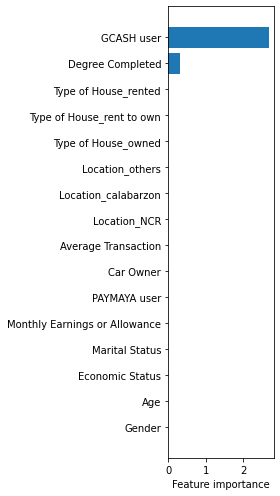

In [200]:
b_lasso = basic_lasso(X,y)

#### basic ridge

In [201]:
def basic_ridge(X,y):
    import time
    from sklearn.linear_model import Ridge
    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = Ridge()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
        coef_list.append(model.coef_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)

    coefs_count = len(mean_abs_coefs)

    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    # fig.suptitle(model_name)
    fig.tight_layout()

    return ['Linear Regression (L2)', best_test, feature_names[np.argmax(mean_abs_coefs)], runtime]

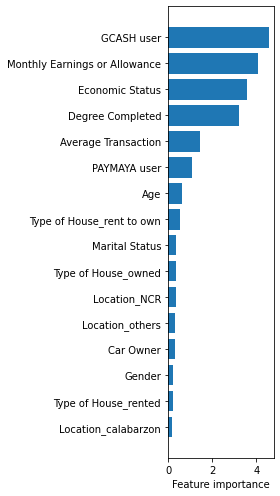

In [202]:
b_ridge = basic_ridge(X,y)

#### basic svr

In [203]:
def basic_svr(X,y):
    import time
    from sklearn.svm import SVR
    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = SVR()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
    #     coef_list.append(model.coef_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    # mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)

    # coefs_count = len(model.coef_)

    return ['SV Regression', best_test, 'NA', runtime]

In [204]:
b_svr = basic_svr(X,y)

#### basic DT

In [205]:
def basic_dt(X,y):
    import time
    from sklearn.tree import DecisionTreeRegressor
    #     from sklearn.ensemble import RandomForestRegressor
    #     from sklearn.ensemble import GradientBoostingRegressor

    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = DecisionTreeRegressor()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
        coef_list.append(model.feature_importances_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)


    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    # fig.suptitle(model_name)
    fig.tight_layout()

    return ['Decision Tree', best_test, feature_names[np.argmax(mean_abs_coefs)], runtime]

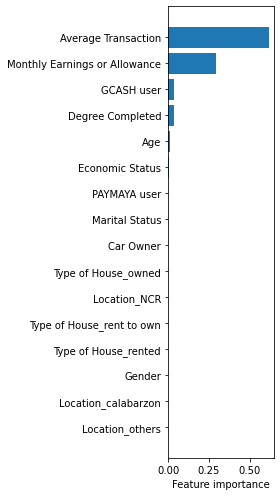

In [206]:
b_dt = basic_dt(X,y)

#### basic RF


In [207]:
def basic_rf(X,y):
    import time
#     from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    #     from sklearn.ensemble import GradientBoostingRegressor

    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = RandomForestRegressor()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
        coef_list.append(model.feature_importances_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)


    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    # fig.suptitle(model_name)
    fig.tight_layout()

    return ['Random Forest Regression', best_test, feature_names[np.argmax(mean_abs_coefs)], runtime]

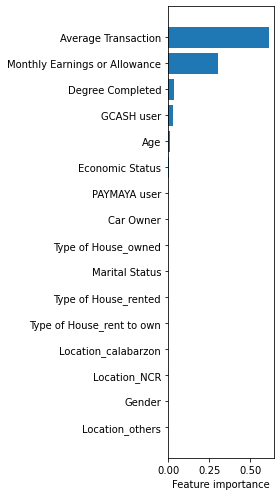

In [208]:
b_rf = basic_rf(X,y)

#### basic GBM

In [209]:
def basic_gbm(X,y):
    import time
#     from sklearn.tree import DecisionTreeRegressor
#     from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor

    start_time = time.time()
    score_list = []
    coef_list = []
    for seed in range(n_trials):
        from sklearn.model_selection import train_test_split

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=0.25,
                                                                      random_state=seed)

        from sklearn.preprocessing import MinMaxScaler
        MM_scaler = MinMaxScaler()
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full)
        X_test_scaled = MM_scaler.transform(X_test)

        model = GradientBoostingRegressor()
        model.fit(X_train_full_scaled, y_train_full)
        test_score = model.score(X_test_scaled, y_test)
        score_list.append(test_score)
        coef_list.append(model.feature_importances_)

    runtime = time.time() - start_time
    best_test = np.mean(score_list)

    mean_abs_coefs = np.mean(np.abs(coef_list), axis=0)


    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    # fig.suptitle(model_name)
    fig.tight_layout()

    return ['GBM Regression', best_test, feature_names[np.argmax(mean_abs_coefs)], runtime]

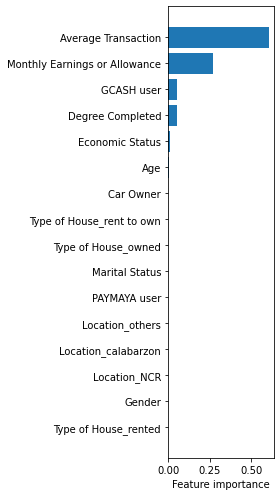

In [210]:
b_gbm = basic_gbm(X,y)

## Summary of Simple Models

In [211]:
models_list = [b_knn, b_lasso, b_ridge, b_svr,
              b_dt, b_rf, b_gbm]
col_summary = ['ML Model', 
           'Test Accuracy',
           'Top Predictor', 
           'Run Time']
df_summary = pd.DataFrame(columns=col_summary)

for i, model in enumerate(models_list):
    df_summary.loc[i] = model
df_summary['Test Accuracy'] = df_summary['Test Accuracy'].apply(lambda x: (str((x*100)))[:5] + ' %')
df_summary

,ML Model,Test Accuracy,Top Predictor,Run Time
0,KNN,26.19 %,NA,0.103722
1,Linear Regression (L1),17.62 %,GCASH user,0.108709
2,Linear Regression (L2),37.69 %,GCASH user,0.086767
3,SV Regression,37.41 %,NA,0.569953
4,Decision Tree,89.00 %,Average Transaction,0.081781
5,Random Forest Regression,93.62 %,Average Transaction,2.624535
6,GBM Regression,85.65 %,Average Transaction,1.082054


## Results of Simple Model

It appears that even at default parameters, tree based models are already yielding high test accuracy scores. Random Forest regression took the longest time to run out of all models tested. Despite the long run time, it provided the best test accuracy among all the models at default settings. 

## Improving the GBM model

In [227]:
# PLEASE REMOVE SCALING
def GBM_reg(X,y):
    import time
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    start_time = time.time()
    max_depth_list = list(np.arange(1,6))
    parameters = {'max_depth': max_depth_list,
                  'n_estimators': [100],
                  'max_features': [0.1, .2, .3, .4, .5, .7],
                  'learning_rate': np.arange(0.01, 0.1, 0.02)}


    GS = GridSearchCV(
        GradientBoostingRegressor(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

#     GS.best_score_, best_val_acc ###

    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.feature_importances_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)
    # display(coefs_mean)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()
    top_pred = ''
    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['GBM Regression', 'learning_rate, max_depth, max_features, n_estimators',
    best_params, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

GradientBoostingRegressor(learning_rate=0.08999999999999998, max_depth=5,
                          max_features=0.7)


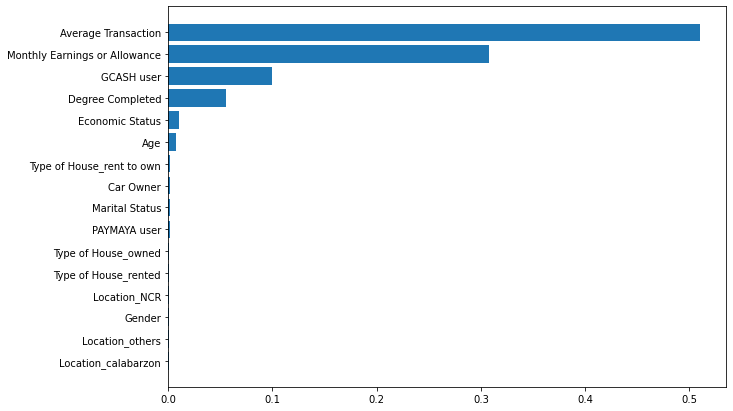

In [228]:
new_gbm = GBM_reg(X,y)

In [226]:
col_summary = ['ML Model', 
           'Hyperparameter', 
           'Best Parameters', 
           'Best Train Accuracy', 
           'Best Validation Accuracy', 
           'Best Test Accuracy', 
           'Top Predictor', 
           'Run Time']
df_gbm = pd.DataFrame(columns=col_summary)
df_gbm.loc[0] = new_gbm
df_gbm

,ML Model,Hyperparameter,Best Parameters,Best Train Accuracy,Best Validation Accuracy,Best Test Accuracy,Top Predictor,Run Time
0,GBM CLF,"learning_rate, max_depth, max_features, n_esti...","{'learning_rate': 0.06999999999999999, 'max_de...",0.990452,0.922725,0.918219,Average Transaction,55.131254
